In [2]:
import sys
sys.path.append('..')

from wxdata.utils import find_latlon

In [110]:
%env WORKDIR ~/Documents/weatherpy-work

env: WORKDIR=~/Documents/weatherpy-work


In [93]:
chase_bdys_ne = [
    (49, -96.8),
    'Thief River Falls, MN',
    'Fergus Falls, MN',
    'Minneapolis, MN',
    'Rochester, MN',
    'Iowa City, IA',
    'Unionville, MO',
    'Sedalia, MO',
    'Nevada, MO',
    'Springfield, MO',
]

chase_bdys_se = [
    # 'Springfield, MO',
    'Tulsa, OK',
    'Stroud, OK',
    'Durant, OK',
    'Paris, TX',
    'Athens, TX',
    'Waco, TX',
    'San Angelo, TX'
]

chase_bdys_sw = [
    #'San Angelo, TX',
    'Monahans, TX',
    'Carlsbad, NM',
    'Roswell, NM',
    'Santa Rosa, NM',
    'Des Moines, NM',
    'Pueblo, CO',
    'Denver, CO'
]

chase_bdys_nw = [
    # 'Denver, CO',
    'Orin, WY',
    'Buffalo Gap, SD',
    'Rapid City, SD',
    'Sturgis, SD',
    'Broadus, MT',
    'Miles City, MT',
    'Roundup, MT',
    (49, -108.5) # MT- Canada border
]

In [94]:
chase_bdys = chase_bdys_nw + chase_bdys_ne + chase_bdys_se + chase_bdys_sw

from collections import OrderedDict
chase_bdy_coords = OrderedDict()

for city in chase_bdys:
    if not isinstance(city, tuple):
        lat, lon = find_latlon(city)
    else:
        lat, lon = city
    chase_bdy_coords[city]= (lat, lon)

In [95]:
chase_bdy_coords

OrderedDict([('Orin, WY', (42.6533015, -105.1924778)),
             ('Buffalo Gap, SD', (43.49165, -103.312975)),
             ('Rapid City, SD', (44.081176, -103.228006)),
             ('Sturgis, SD', (44.409707, -103.509079)),
             ('Broadus, MT', (45.443881, -105.40749)),
             ('Miles City, MT', (46.4085273, -105.840981)),
             ('Roundup, MT', (46.445242, -108.5417999)),
             ((49, -108.5), (49, -108.5)),
             ((49, -96.8), (49, -96.8)),
             ('Thief River Falls, MN', (48.1172301, -96.1770667)),
             ('Fergus Falls, MN', (46.283015, -96.077558)),
             ('Minneapolis, MN', (44.9772995, -93.2654692)),
             ('Rochester, MN', (44.0233269, -92.4630215)),
             ('Iowa City, IA', (41.6612561, -91.5299106)),
             ('Unionville, MO', (40.4769606, -93.0032615)),
             ('Sedalia, MO', (38.7044609, -93.2282613)),
             ('Nevada, MO', (37.8389595, -94.3549187)),
             ('Springfield, MO', (37

In [96]:
import numpy as np
coords = list(chase_bdy_coords.values())
coords.append(coords[0])
arr = np.array(coords)

In [97]:
arr[:, 0]

array([ 42.6533015,  43.49165  ,  44.081176 ,  44.409707 ,  45.443881 ,
        46.4085273,  46.445242 ,  49.       ,  49.       ,  48.1172301,
        46.283015 ,  44.9772995,  44.0233269,  41.6612561,  40.4769606,
        38.7044609,  37.8389595,  37.2166779,  36.1556805,  35.773536 ,
        33.9939861,  33.6617962,  32.2048735,  31.549333 ,  31.4648357,
        31.5942992,  32.4207262,  33.3943282,  34.93867  ,  36.7633643,
        38.2544472,  39.7391536,  42.6533015])

In [101]:
from shapely.geometry import MultiPoint, Polygon, Point

chasepoly = Polygon(coords)

In [84]:
from wxdata.plotting import simple_basemap
%matplotlib inline
import matplotlib.pyplot as plt

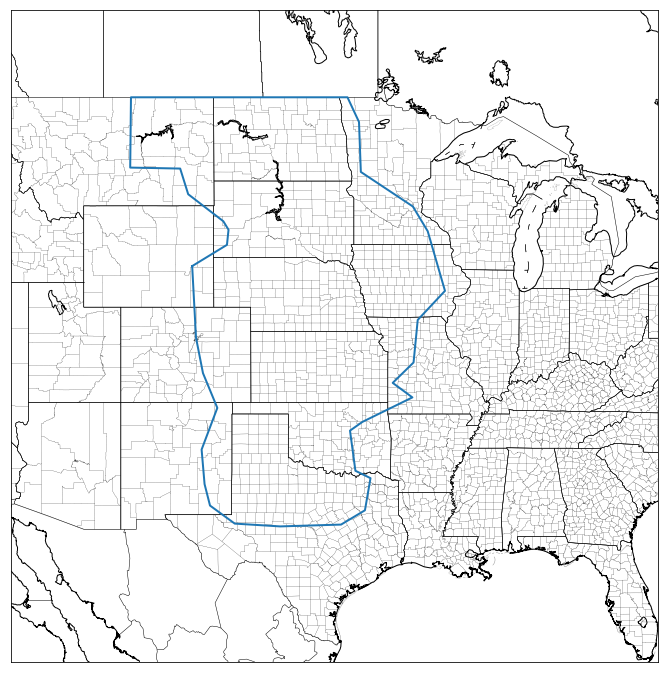

In [111]:
fig = plt.figure(figsize=(12, 12))
m = simple_basemap(bbox=(-115, -80, 25, 52), proj='merc', 
                   draw=('coastlines', 'countries', 'states', 'counties'))
m.plot(arr[:, 1], arr[:, 0], latlon=True, linewidth=2)

In [105]:
okc = Point(*find_latlon('Oklahoma City, OK'))
rapidcity = Point(*find_latlon('Rapid City, SD'))
stl = Point(*find_latlon('St. Louis, MO'))

In [108]:
(chasepoly.contains(okc),
chasepoly.contains(rapidcity),
chasepoly.contains(stl))

(True, False, False)